In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check for Null and Duplicate values

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.duplicated().any()

False

### Get the distribution of each output class

In [6]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
X = dataset.drop(columns = ['Species', 'Id'])
y = dataset['Species']
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


### Visualization

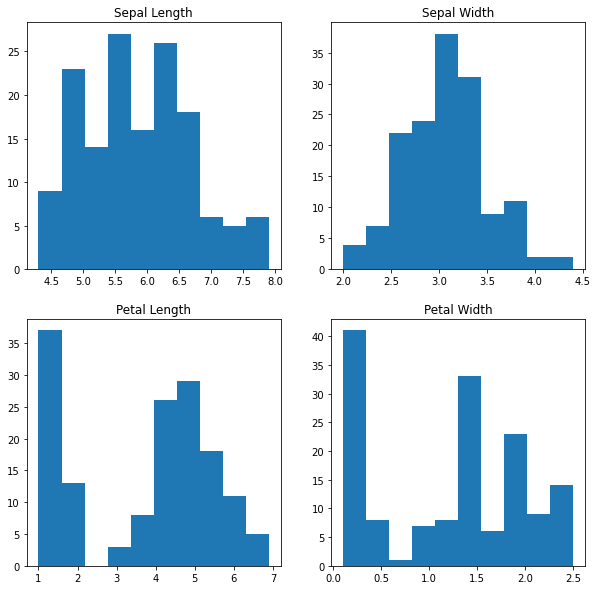

In [47]:
fig, axis = plt.subplots(2, 2, figsize=(10,10))
axis[0,0].hist(X['SepalLengthCm'], bins = 10);
axis[0,0].set_title('Sepal Length');
axis[0,1].hist(X['SepalWidthCm'], bins = 10);
axis[0,1].set_title('Sepal Width');
axis[1,0].hist(X['PetalLengthCm'], bins = 10);
axis[1,0].set_title('Petal Length');
axis[1,1].hist(X['PetalWidthCm'], bins = 10);
axis[1,1].set_title('Petal Width');

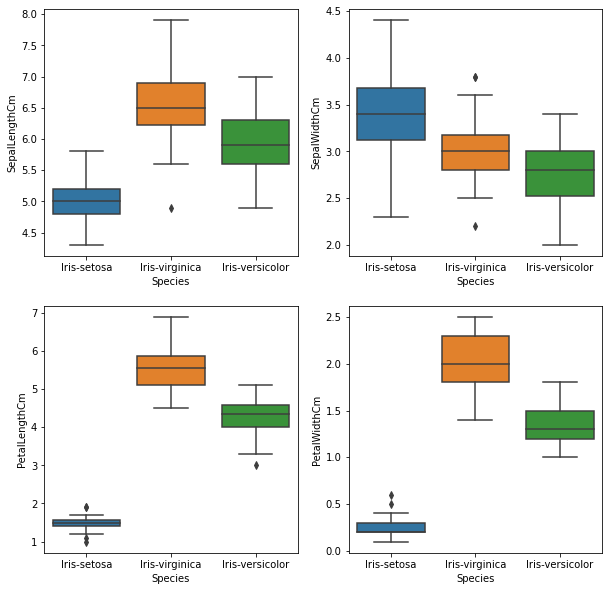

In [58]:
fig, axis = plt.subplots(2, 2, figsize = (10,10))
label = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = dataset, order = label, ax = axis[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = dataset, order = label, ax = axis[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = dataset, order = label, ax = axis[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = dataset,  order = label, ax = axis[1,1]);

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier(criterion= 'gini' , random_state= 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
ypred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, ypred))


Accuracy: 0.9555555555555556


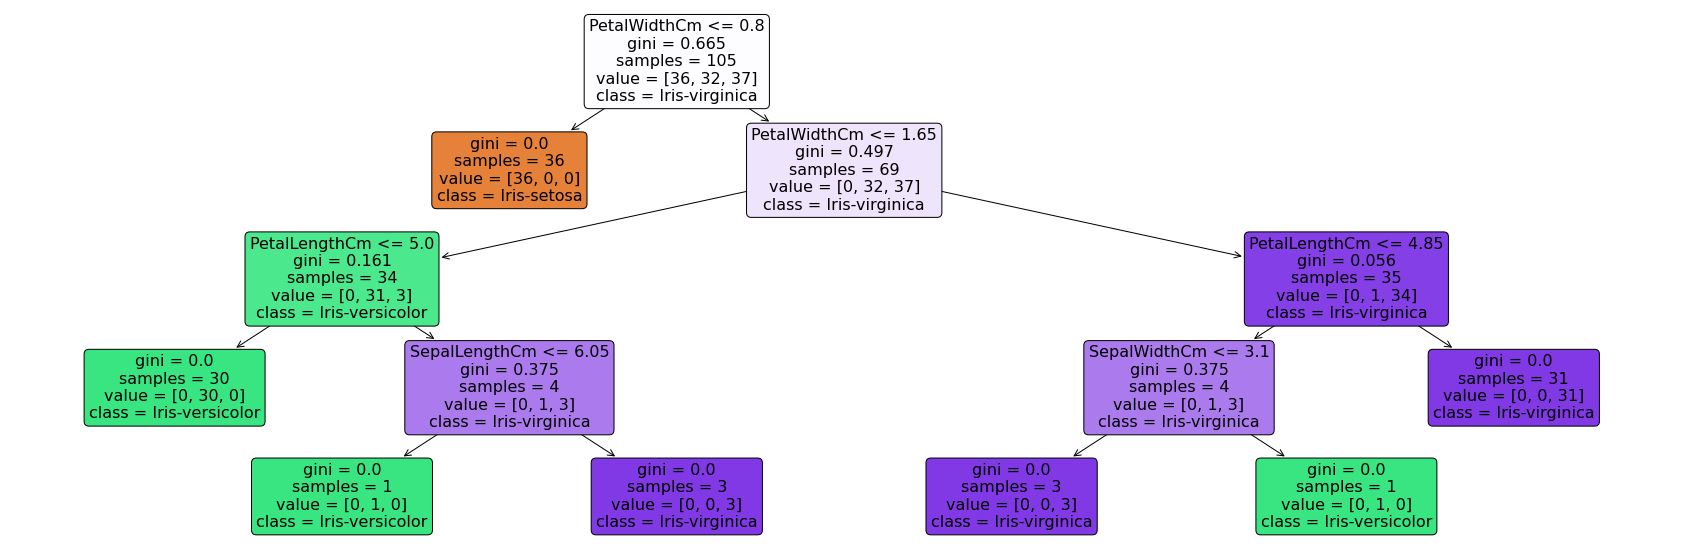

In [12]:
from sklearn import tree

plt.figure(figsize=(30,10))
features = X.columns
labels = y.unique()
a = tree.plot_tree(model, feature_names = features, class_names = labels, rounded = True, filled = True, fontsize=16)
plt.show()

### Check for sample input

In [13]:
sample = [4.9, 3.1, 1.6, 0.1]

ytest = model.predict([sample])
print(ytest)

['Iris-setosa']


### Optimizing Model using GridSearch CV
#### Using the default 5-fold cross validation

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,3,4,5,6,8], 'min_samples_split': [2,4,6,8,10]}]

clf = GridSearchCV(model, param_grid = parameters)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

0.9523809523809523
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [38]:
model1= DecisionTreeClassifier(min_samples_split= 2, max_depth= 3, criterion= 'gini', random_state= 1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [39]:
ypred1 = model1.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, ypred1))

Accuracy: 0.9555555555555556


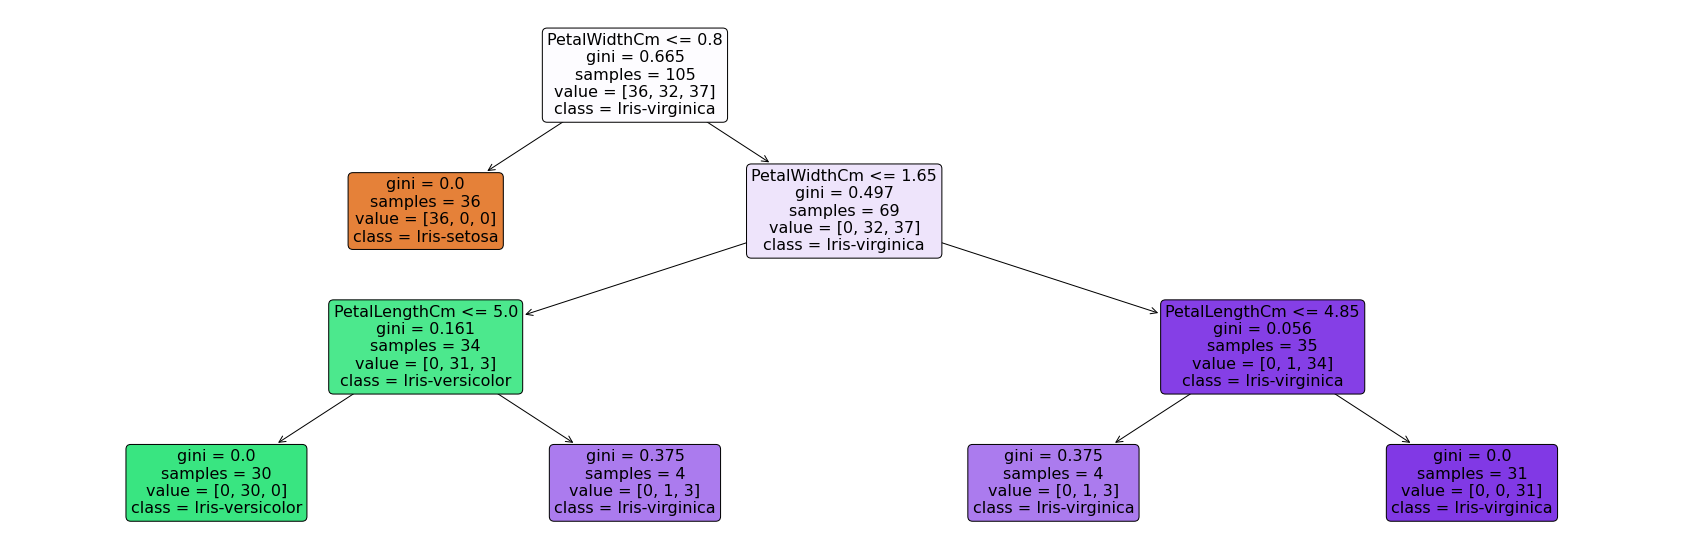

In [40]:
plt.figure(figsize=(30,10))
features = X.columns
labels = y.unique()
a = tree.plot_tree(model1, feature_names = features, class_names = labels, rounded = True, filled = True, fontsize=16)
plt.show()